# Decorrelation lengths for trends and its distribution

In [174]:
%matplotlib inline
import numpy as np
import xarray as xr
import scipy.io as sio
import os
import matplotlib.pyplot as plt

import utils as utils
from scipy import signal
from scipy import stats

In [2]:
def autocorr(x, twosided=False, tapered=True):
    """
    Return (lags, ac), where ac is the estimated autocorrelation 
    function for x, at the full set of possible lags.
    
    If twosided is True, all lags will be included;
    otherwise (default), only non-negative lags will be included.

    If tapered is True (default), the low-MSE estimate, linearly
    tapered to zero for large lags, is returned.
    """
    nx = len(x)
    xdm = x - x.mean()
    ac = np.correlate(xdm, xdm, mode='full')
    ac /= ac[nx - 1]
    lags = np.arange(-nx + 1, nx)
    if not tapered:  # undo the built-in taper
        taper = 1 - np.abs(lags) / float(nx)
        ac /= taper
    if twosided:
        return lags, ac
    else:
        return lags[nx-1:], ac[nx-1:]

## vertical decorrelation scale

### N2

#### all depth

In [187]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_notnan_len = np.zeros(len(Data.LL_st), ) + np.nan
        for i in range(len(Data.LL_st)):
            var = Data.trend_N2_mean[i,::-1].data[~np.isnan(Data.trend_N2_mean[i,::-1]).data]
            if len(var)>2:
                var_notnan_len[i] = len(var)
        
        if count == 0:
            var_notnan_len_ = var_notnan_len.copy()
        else:
            np.append(var_notnan_len_, var_notnan_len)
            
        count += 1

(123.0, 119.43578767123287)

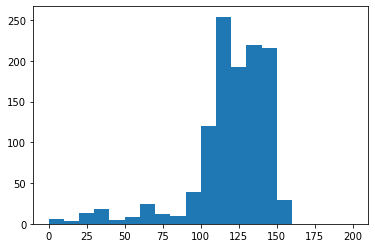

In [188]:
plt.hist(var_notnan_len_, bins=20, range=(0,200))
np.nanmedian(var_notnan_len_), np.nanmean(var_notnan_len_)

In [189]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_decorr_len = np.zeros(len(Data.LL_st), ) + np.nan
        for i in range(len(Data.LL_st)):
            var = Data.trend_N2_mean[i,::-1].data[~np.isnan(Data.trend_N2_mean[i,::-1]).data]
            if len(var)>2:
                var_ = signal.detrend(var)
                var_auto_lag_, var_auto_ = autocorr(var_)
                var_lag_dist = (var_auto_lag_+1)*np.diff(Data.z_N2)[0] # unit m
                var_decorr_len[i] = var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]
        
        if count == 0:
            var_decorr_len_ = var_decorr_len.copy()
        else:
            np.append(var_decorr_len_, var_decorr_len)
            
        count += 1

(80.0, 165.58219178082192)

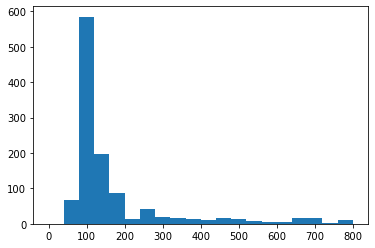

In [190]:
plt.hist(var_decorr_len_, bins=20, range=(0,800))
np.nanmedian(var_decorr_len_), np.nanmean(var_decorr_len_)

(280.0,
 array([ 1.00000000e+00,  6.76119158e-01,  3.44879873e-01,  1.33445051e-01,
        -2.32785711e-02,  2.15203565e-02,  4.66754443e-03, -8.41346965e-02,
        -8.58615946e-02, -3.25243551e-02, -4.76005580e-02, -8.92736380e-02,
        -9.59804145e-02, -1.03722040e-01, -7.69965506e-02, -5.66123055e-02,
        -7.35464812e-02, -7.98246016e-02, -8.17494858e-02, -8.87557216e-02,
        -7.30173065e-02, -6.28623771e-02, -4.59741871e-02, -3.52603826e-02,
        -3.16203736e-02, -2.44320130e-02, -2.88240705e-02, -4.65481097e-02,
        -5.24282532e-02, -3.65109872e-02, -2.84424066e-02, -2.48122073e-02,
        -2.09615596e-02, -3.44961853e-02, -3.91953177e-02, -2.37889975e-02,
        -1.64644189e-02, -1.15515864e-02,  1.22194482e-03,  3.13716317e-03,
         5.40698993e-04,  3.74291859e-03, -2.82324913e-03, -1.40536260e-02,
        -1.51670577e-02, -1.25793681e-02, -1.43583129e-03,  1.83778184e-02,
         2.05116018e-02,  3.71341213e-03, -2.94527946e-03, -1.64322538e-03,
    

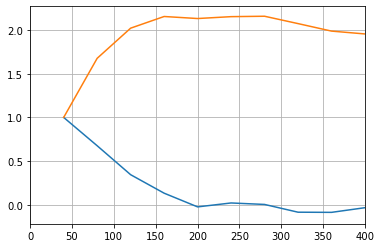

In [191]:
i = 40
var = Data.trend_N2_mean[i,::-1].data[~np.isnan(Data.trend_N2_mean[i,::-1]).data]
var_ = signal.detrend(var)
var_auto_lag_, var_auto_ = autocorr(var_)
var_lag_dist = (var_auto_lag_+1)*np.diff(Data.z_N2)[0] # unit m
plt.plot(var_lag_dist, var_auto_)
plt.plot(var_lag_dist, np.cumsum(var_auto_))
plt.xlim([0,400])
plt.grid(True)
var_decorr_len[i], var_auto_

(nan,
 array([ 1.00000000e+00,  6.76119158e-01,  3.44879873e-01,  1.33445051e-01,
        -2.32785711e-02,  2.15203565e-02,  4.66754443e-03, -8.41346965e-02,
        -8.58615946e-02, -3.25243551e-02, -4.76005580e-02, -8.92736380e-02,
        -9.59804145e-02, -1.03722040e-01, -7.69965506e-02, -5.66123055e-02,
        -7.35464812e-02, -7.98246016e-02, -8.17494858e-02, -8.87557216e-02,
        -7.30173065e-02, -6.28623771e-02, -4.59741871e-02, -3.52603826e-02,
        -3.16203736e-02, -2.44320130e-02, -2.88240705e-02, -4.65481097e-02,
        -5.24282532e-02, -3.65109872e-02, -2.84424066e-02, -2.48122073e-02,
        -2.09615596e-02, -3.44961853e-02, -3.91953177e-02, -2.37889975e-02,
        -1.64644189e-02, -1.15515864e-02,  1.22194482e-03,  3.13716317e-03,
         5.40698993e-04,  3.74291859e-03, -2.82324913e-03, -1.40536260e-02,
        -1.51670577e-02, -1.25793681e-02, -1.43583129e-03,  1.83778184e-02,
         2.05116018e-02,  3.71341213e-03, -2.94527946e-03, -1.64322538e-03,
      

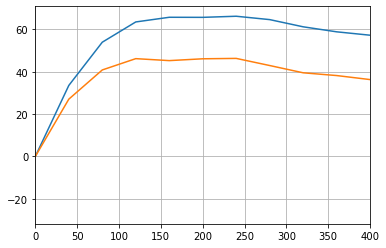

In [225]:
i = 40
var = Data.trend_N2_mean[i,:].data[~np.isnan(Data.trend_N2_mean[i,:]).data]
var_ = signal.detrend(var)
var_auto_lag_, var_auto_ = autocorr(var_)
var_lag_dist = (var_auto_lag_)*np.diff(Data.z_N2)[0] # unit m
var_auto_int = np.zeros(len(var_auto_),)
for i in range(len(var_auto_int)):
    var_auto_int[i]=np.trapz(var_auto_[:i+1],var_lag_dist[:i+1])
plt.plot(var_lag_dist, var_auto_int)
plt.plot(var_lag_dist, np.cumsum(var_auto_)*40-40)
plt.xlim([0,400])
plt.grid(True)
var_decorr_len[i], var_auto_

In [230]:
i = 1
var_auto_[:i+1],var_lag_dist[:i+1], var_auto_int[i], np.cumsum(var_auto_[:i+1])*40-40

(array([1.        , 0.67611916]),
 array([ 0, 40]),
 33.52238316022251,
 array([ 0.        , 27.04476632]))

In [215]:
var_auto_lag_, var_lag_dist,var_auto_int

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 array([   0,   40,   80,  120,  160,  200,  240,  280,  320,  360,  400,
         440,  480,  520,  560,  600,  640,  680,  720,  760,  800,  840,
         880,  920,  960, 1000, 1040, 1080, 1120, 1160, 1200, 1240, 1280,
        1320, 1360, 1400, 1440, 1480, 1520, 1560, 1600, 1640, 1680, 1720,
        1760, 1800, 1840, 1880, 1920, 1960, 2000, 2040, 2080, 2120, 2160,
      

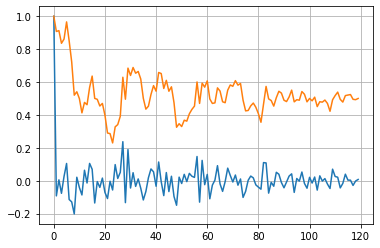

In [122]:
decorr_rand = np.zeros(10000,)
n=120
for i in range(len(decorr_rand)):
    var_rand = signal.detrend(np.random.rand(n))
    decorr_rand[i]=np.where(np.cumsum(autocorr(var_rand)[1]) == np.max(np.cumsum(autocorr(var_rand)[1])))[0][0]   

plt.plot(autocorr(var_rand)[0],autocorr(var_rand)[1])
plt.plot(autocorr(var_rand)[0],np.cumsum(autocorr(var_rand)[1]))
plt.grid(True)


(2.0, 5.38805)

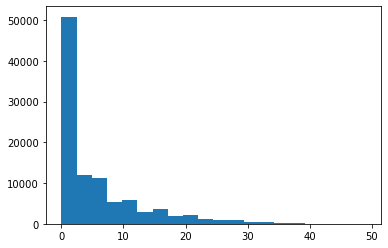

In [123]:
plt.hist(decorr_rand, bins=20)#, range=(0,40))
np.nanmedian(decorr_rand), np.nanmean(decorr_rand)

#### below 2000 m

In [130]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_notnan_len = np.zeros(len(Data.LL_st), ) + np.nan
        for i in range(len(Data.LL_st)):
            var = Data.trend_N2_mean[i,Data.z_N2>=2000].data[~np.isnan(Data.trend_N2_mean[i,Data.z_N2>=2000]).data]
            if len(var)>2:
                var_notnan_len[i] = len(var)
        
        if count == 0:
            var_notnan_len_ = var_notnan_len.copy()
        else:
            np.append(var_notnan_len_, var_notnan_len)
            
        count += 1

(75.0, 74.20409982174688)

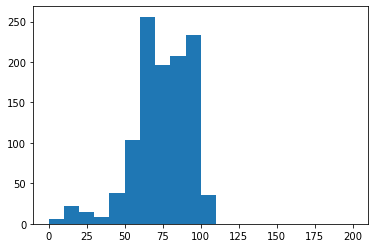

In [131]:
plt.hist(var_notnan_len_, bins=20, range=(0,200))
np.nanmedian(var_notnan_len_), np.nanmean(var_notnan_len_)

In [144]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_decorr_len = np.zeros(len(Data.LL_st), ) + np.nan
        for i in range(len(Data.LL_st)):
            var = Data.trend_N2_mean[i,Data.z_N2>=2000].data[~np.isnan(Data.trend_N2_mean[i,Data.z_N2>=2000]).data]
            if len(var)>2:
                var_ = signal.detrend(var[::-1])
                var_auto_lag_, var_auto_ = autocorr(var_)
                var_lag_dist = (var_auto_lag_+1)*np.diff(Data.z_N2)[0] # unit m
                var_decorr_len[i] = var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]
        
        if count == 0:
            var_decorr_len_ = var_decorr_len.copy()
        else:
            np.append(var_decorr_len_, var_decorr_len)
            
        count += 1

(120.0, 195.2584670231729)

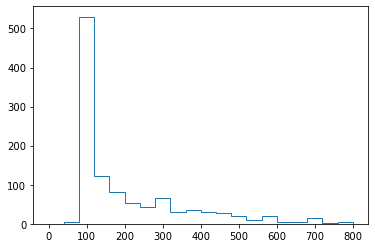

In [169]:
counts, bins = np.histogram(var_decorr_len_, bins=20, range=(0,800))
plt.stairs(counts, bins)
# plt.hist(var_decorr_len_, bins=20, range=(0,800))
np.nanmedian(var_decorr_len_), np.nanmean(var_decorr_len_)

In [170]:
counts, bins

(array([  0,   5, 530, 122,  82,  53,  43,  65,  29,  36,  31,  28,  21,
         11,  19,   5,   4,  16,   2,   4]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.,
        440., 480., 520., 560., 600., 640., 680., 720., 760., 800.]))

In [176]:
stats.mode(var_decorr_len_)

ModeResult(mode=array([80.]), count=array([530]))

(80.0,
 array([ 1.00000000e+00,  1.03487253e-01, -2.87122694e-01, -1.80059208e-01,
        -9.54568765e-02,  2.39587536e-02,  5.84743147e-02,  1.24451605e-01,
        -1.20689697e-01, -1.10556069e-01,  1.64732010e-01,  1.48455385e-01,
         6.64581781e-02, -9.53072753e-03, -8.15490299e-02, -1.18235366e-01,
        -1.39319018e-01,  4.85746053e-02,  1.61257035e-01,  4.83950834e-02,
        -1.07744438e-01, -7.75869978e-02, -2.16564521e-03,  1.17040422e-01,
         1.47209416e-01, -1.73635041e-01, -2.55179588e-01,  1.03377571e-02,
         5.91036476e-02,  1.00563306e-01,  9.63035806e-02, -1.04284561e-02,
        -2.18162532e-01, -3.59724418e-02,  1.83482109e-01, -1.85965232e-02,
        -1.37944092e-01, -8.43913694e-02, -3.22114688e-02,  2.51612538e-02,
         9.12763176e-02,  1.21482388e-01, -2.42179677e-02, -1.45557453e-01,
        -5.46471281e-02, -3.55644232e-02, -1.11526974e-02,  7.73132336e-02,
         5.15264504e-02, -1.66962471e-02, -1.37415789e-01, -2.34446262e-02,
     

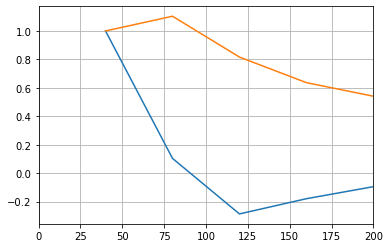

In [152]:
i = 50
var = Data.trend_N2_mean[i,Data.z_N2>=2000].data[~np.isnan(Data.trend_N2_mean[i,Data.z_N2>=2000]).data]
var_ = signal.detrend(var[::-1])
var_auto_lag_, var_auto_ = autocorr(var_)
var_lag_dist = (var_auto_lag_+1)*np.diff(Data.z_N2)[0] # unit m
plt.plot(var_lag_dist, var_auto_)
plt.plot(var_lag_dist, np.cumsum(var_auto_))
plt.xlim([0,200])
plt.grid(True)
var_decorr_len[i], var_auto_

(0.0, 40.0)

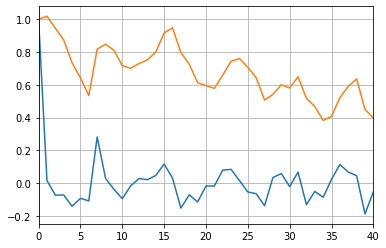

In [159]:
decorr_rand = np.zeros(40000,)
n=75
for i in range(len(decorr_rand)):
    var_rand = signal.detrend(np.random.rand(n))
    decorr_rand[i]=(np.where(np.cumsum(autocorr(var_rand)[1]) == np.max(np.cumsum(autocorr(var_rand)[1])))[0][0]+1)*np.diff(Data.z_N2)[0] #unit m

plt.plot(autocorr(var_rand)[0],autocorr(var_rand)[1])
plt.plot(autocorr(var_rand)[0],np.cumsum(autocorr(var_rand)[1]))
plt.grid(True)
plt.xlim(0,40)

(80.0, 172.625, 40.0)

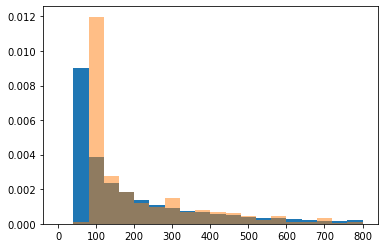

In [164]:
plt.hist(decorr_rand, bins=20, range=(0,800), density=True)
plt.hist(var_decorr_len_, bins=20, range=(0,800), density=True, alpha=.5)
np.nanmedian(decorr_rand), np.nanmean(decorr_rand), np.nanmin(decorr_rand)

In [177]:
stats.mode(decorr_rand)

ModeResult(mode=array([40.]), count=array([14334]))

(6000.0, 2000.0)

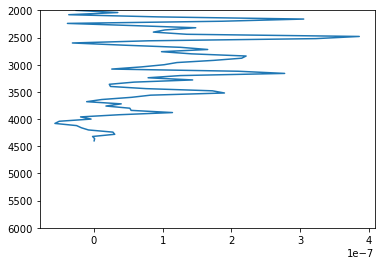

In [47]:
plt.plot(var,Data.z_N2[Data.z_N2>=2000].data[~np.isnan(Data.trend_N2_mean[i,Data.z_N2>=2000]).data])
plt.ylim([6000,2000])

### CT

#### all depth

In [48]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_decorr_len = np.zeros(len(Data.LL_st), ) + np.nan
        for i in range(len(Data.LL_st)):
            var = Data.trend_CT_mean[i,::-1].data[~np.isnan(Data.trend_CT_mean[i,::-1]).data]
            if len(var)>2:
                var_ = signal.detrend(var)
                var_auto_lag_, var_auto_ = autocorr(var_)
                var_lag_dist = var_auto_lag_*np.diff(Data.z_N2)[0] # unit m
                var_decorr_len[i] = var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]
        
        if count == 0:
            var_decorr_len_ = var_decorr_len.copy()
        else:
            np.append(var_decorr_len_, var_decorr_len)
            
        count += 1

(240.0, 361.49532710280374)

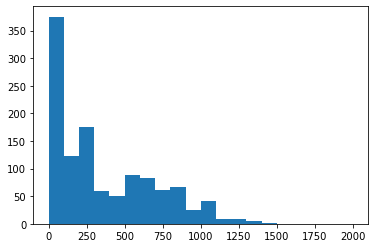

In [49]:
plt.hist(var_decorr_len_, bins=20, range=(0,2000))
np.nanmedian(var_decorr_len_), np.nanmean(var_decorr_len_)

#### below 2000 m

In [52]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_decorr_len = np.zeros(len(Data.LL_st), ) + np.nan
        for i in range(len(Data.LL_st)):
            var = Data.trend_CT_mean[i,Data.z_N2>=2000].data[~np.isnan(Data.trend_CT_mean[i,Data.z_N2>=2000]).data]
            if len(var)>2:
                var_ = signal.detrend(var[::-1])
                var_auto_lag_, var_auto_ = autocorr(var_)
                var_lag_dist = var_auto_lag_*np.diff(Data.z_N2)[0] # unit m
                var_decorr_len[i] = var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]
        
        if count == 0:
            var_decorr_len_ = var_decorr_len.copy()
        else:
            np.append(var_decorr_len_, var_decorr_len)
            
        count += 1

(440.0, 459.3766696349065)

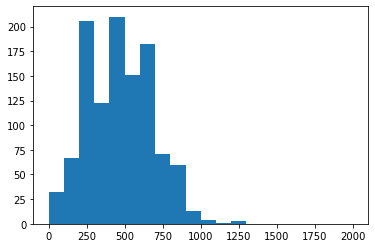

In [53]:
plt.hist(var_decorr_len_, bins=20, range=(0,2000))
np.nanmedian(var_decorr_len_), np.nanmean(var_decorr_len_)

## horizontal decorrelation scale

In [56]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_decorr_len = np.zeros(len(Data.z_N2), ) + np.nan
        for i in range(len(Data.z_N2)):
            var = Data.trend_N2_mean[:,i].data[~np.isnan(Data.trend_N2_mean[:,i]).data]
#             if (len(var)>2) & (Data.z_N2[i]>=2000):
            if (len(var)>2):
                var_ = signal.detrend(var)
                var_auto_lag_, var_auto_ = autocorr(var_)
                var_lag_dist = var_auto_lag_*np.abs(np.diff(Data.LL_st)[0])*111 # unit km
                var_decorr_len[i] = var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]
        
        if count == 0:
            var_decorr_len_ = var_decorr_len.copy()
        else:
            np.append(var_decorr_len_, var_decorr_len)
            
        count += 1

1431.8999999999187

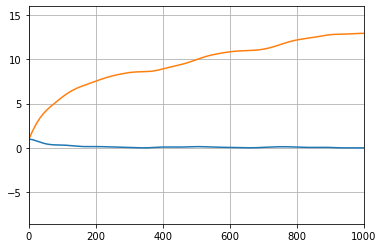

In [57]:
i = 20
var = Data.trend_N2_mean[:,i].data[~np.isnan(Data.trend_N2_mean[:,i]).data]
var_ = signal.detrend(var)
var_auto_lag_, var_auto_ = autocorr(var_)
var_lag_dist = var_auto_lag_*np.abs(np.diff(Data.LL_st)[0])*11e+4/1e+3 # unit km
plt.plot(var_lag_dist, var_auto_)
plt.xlim([0,1000])
plt.grid(True)
plt.plot(var_lag_dist, np.cumsum(var_auto_))
plt.xlim([0,1000])
plt.grid(True)
var_decorr_len[i]

(321.8999999999817, 561.6599999999681)

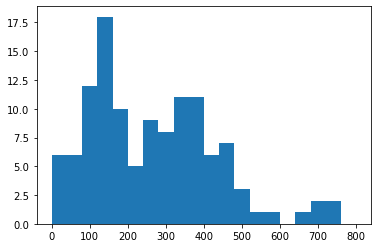

In [58]:
plt.hist(var_decorr_len_, bins=20, range=(0,800))
np.nanmedian(var_decorr_len_), np.nanmean(var_decorr_len_)

In [59]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_decorr_len = np.zeros(len(Data.z_N2), ) + np.nan
        for i in range(len(Data.z_N2)):
            var = Data.trend_CT_mean[:,i].data[~np.isnan(Data.trend_CT_mean[:,i]).data]
#             if (len(var)>2) & (Data.z_N2[i]>=2000):
            if (len(var)>2):
                var_ = signal.detrend(var)
                var_auto_lag_, var_auto_ = autocorr(var_)
                var_lag_dist = var_auto_lag_*np.abs(np.diff(Data.LL_st)[0])*111 # unit km
                var_decorr_len[i] = var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]
        
        if count == 0:
            var_decorr_len_ = var_decorr_len.copy()
        else:
            np.append(var_decorr_len_, var_decorr_len)
            
        count += 1

(1071.1499999999392, 991.9044303796904)

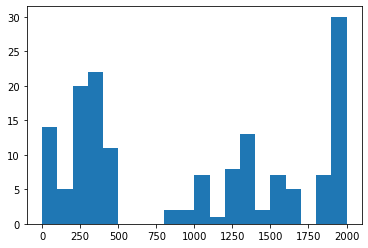

In [60]:
plt.hist(var_decorr_len_, bins=20, range=(0,2000))
np.nanmedian(var_decorr_len_), np.nanmean(var_decorr_len_)

In [62]:
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
count = 0
for filename_ in os.listdir(datafilepath):
    if (filename_.endswith("_withtrend.nc")):  
        Data = xr.open_dataset(datafilepath + filename_)

        var_decorr_len = np.zeros(len(Data.z_N2), ) + np.nan
        for i in range(len(Data.z_N2)):
            var = Data.trend_CT_mean[:,i].data[~np.isnan(Data.trend_CT_mean[:,i]).data]
            if (len(var)>2) & (Data.z_N2[i]>=2000):
#             if (len(var)>2):
                var_ = signal.detrend(var)
                var_auto_lag_, var_auto_ = autocorr(var_)
                var_lag_dist = var_auto_lag_*np.abs(np.diff(Data.LL_st)[0])*111 # unit km
                var_decorr_len[i] = var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]
        
        if count == 0:
            var_decorr_len_ = var_decorr_len.copy()
        else:
            np.append(var_decorr_len_, var_decorr_len)
            
        count += 1

(1109.9999999999368, 1064.058333333273)

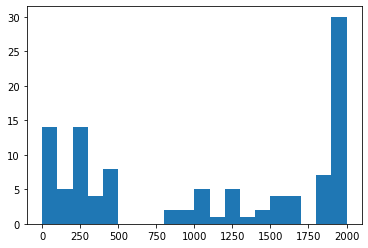

In [63]:
plt.hist(var_decorr_len_, bins=20, range=(0,2000))
np.nanmedian(var_decorr_len_), np.nanmean(var_decorr_len_)

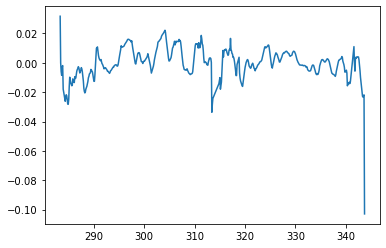

In [104]:
plt.plot(Data.LL_st.data[~np.isnan(Data.trend_CT_mean[:,i]).data], var_)

1001.0000000002276

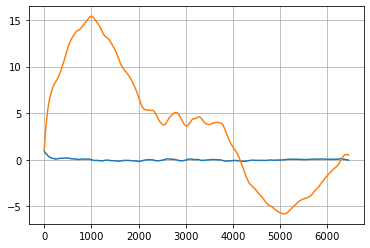

In [103]:
i = 90
Data = xr.open_dataset('/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/a05_withtrend.nc')
var = Data.trend_CT_mean[:,i].data[~np.isnan(Data.trend_CT_mean[:,i]).data]
# var = Data.trend_CT_mean[::-1,i].data[~np.isnan(Data.trend_CT_mean[::-1,i]).data]
var_ = signal.detrend(var)#[:100]
var_auto_lag_, var_auto_ = autocorr(var_)
var_lag_dist = var_auto_lag_*np.abs(np.diff(Data.LL_st)[0])*11e+4/1e+3 # unit km
plt.plot(var_lag_dist, var_auto_)
# plt.xlim([0,1000])
plt.grid(True)
plt.plot(var_lag_dist, np.cumsum(var_auto_))
# plt.xlim([0,1000])
plt.grid(True)
var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]

(6000.0, 2000.0)

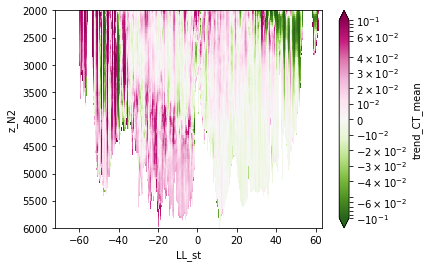

In [29]:
from matplotlib import cm
import matplotlib as mpl

Data = xr.open_dataset('/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/a16-a23_withtrend.nc')
norm = mpl.colors.SymLogNorm(linthresh=5e-2, vmax=1e-1, vmin=-1e-1, base=10)
Data.trend_CT_mean.plot(y='z_N2', vmin=-1e-1, vmax=1e-1,  cmap=cm.PiYG_r, norm=norm)
plt.ylim([6000,2000])

(6000.0, 2000.0)

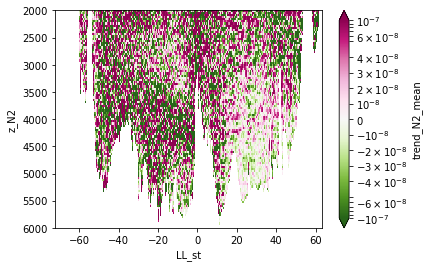

In [30]:
from matplotlib import cm
import matplotlib as mpl

Data = xr.open_dataset('/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/a16-a23_withtrend.nc')
norm = mpl.colors.SymLogNorm(linthresh=5e-8, vmax=1e-7, vmin=-1e-7, base=10)
Data.trend_N2_mean.plot(y='z_N2', vmin=-1e-7, vmax=1e-7,  cmap=cm.PiYG_r, norm=norm)
plt.ylim([6000,2000])

In [185]:
Data_trend = xr.open_dataset('/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/a05_trend.nc')
Data_trend

<xarray.Dataset>
Dimensions:                   (LL_st: 14, N_Occup: 7, two-sided: 2, z_N2: 17)
Coordinates:
  * N_Occup                   (N_Occup) int64 1 2 3 4 5 6 7
  * LL_st                     (LL_st) float64 279.9 284.9 289.9 ... 339.9 344.9
  * z_N2                      (z_N2) int64 0 400 800 1200 ... 5600 6000 6400
  * two-sided                 (two-sided) int64 -1 1
Data variables: (12/14)
    trend_N2_mean             (LL_st, z_N2) float64 ...
    trend_N2_err              (LL_st, z_N2) float64 ...
    trend_N2_CI               (LL_st, z_N2, two-sided) float64 ...
    trend_N2_factor_mean      (LL_st, z_N2) float64 ...
    trend_N2_factor_err       (LL_st, z_N2) float64 ...
    trend_N2_factor_CI        (LL_st, z_N2, two-sided) float64 ...
    ...                        ...
    trend_N2_percentage_CI    (LL_st, z_N2, two-sided) float64 ...
    trend_CT_mean             (LL_st, z_N2) float64 ...
    trend_CT_err              (LL_st, z_N2) float64 ...
    trend_CT_CI               (LL_st, z_N2, two-sided) float64 ...
    time_mean                 (N_Occup, LL_st) datetime64[ns] ...
    eDOF                      (LL_st, z_N2) float64 ...
Attributes:
    title:    N2 data in blocks, given occupations

In [186]:
Data_trend = xr.open_dataset('/Users/stan/Desktop/WORK/2022-2023/EESCGU4925/homework/a05_trend.nc')
Data_trend

<xarray.Dataset>
Dimensions:                   (LL_st: 14, N_Occup: 7, two-sided: 2, z_N2: 17)
Coordinates:
  * N_Occup                   (N_Occup) int64 1 2 3 4 5 6 7
  * LL_st                     (LL_st) float64 279.9 284.9 289.9 ... 339.9 344.9
  * z_N2                      (z_N2) int64 0 400 800 1200 ... 5600 6000 6400
  * two-sided                 (two-sided) int64 -1 1
Data variables: (12/14)
    trend_N2_mean             (LL_st, z_N2) float64 ...
    trend_N2_err              (LL_st, z_N2) float64 ...
    trend_N2_CI               (LL_st, z_N2, two-sided) float64 ...
    trend_N2_factor_mean      (LL_st, z_N2) float64 ...
    trend_N2_factor_err       (LL_st, z_N2) float64 ...
    trend_N2_factor_CI        (LL_st, z_N2, two-sided) float64 ...
    ...                        ...
    trend_N2_percentage_CI    (LL_st, z_N2, two-sided) float64 ...
    trend_CT_mean             (LL_st, z_N2) float64 ...
    trend_CT_err              (LL_st, z_N2) float64 ...
    trend_CT_CI               (LL_st, z_N2, two-sided) float64 ...
    time_mean                 (N_Occup, LL_st) datetime64[ns] ...
    eDOF                      (LL_st, z_N2) float64 ...
Attributes:
    title:    N2 data in blocks, given occupations

(6000.0, 2000.0)

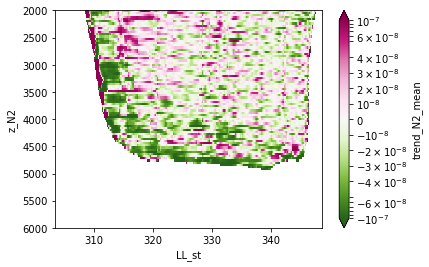

In [179]:
from matplotlib import cm
import matplotlib as mpl

Data = xr.open_dataset('/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/sr04_withtrend.nc')
norm = mpl.colors.SymLogNorm(linthresh=5e-8, vmax=1e-7, vmin=-1e-7, base=10)
Data.trend_N2_mean.plot(y='z_N2', vmin=-1e-7, vmax=1e-7,  cmap=cm.PiYG_r, norm=norm)
plt.ylim([6000,2000])

In [183]:
var /= 10

In [184]:
var

array([ 5.28954425e-08,  1.04328391e-07,  6.93115398e-08,  5.94561354e-08,
        2.69571230e-08,  1.38209086e-08,  8.84272186e-08,  1.63407556e-07,
        9.54078671e-09,  7.60008800e-09,  8.03002010e-08, -5.89445221e-09,
        9.35792384e-08,  4.99851570e-08,  1.37430540e-07,  5.72220142e-08,
        6.94795393e-08,  7.72933646e-08, -6.81758445e-09,  1.38665827e-08,
        4.24029309e-08,  2.81407042e-08,  7.05778652e-09, -1.94279284e-08,
        9.31304265e-08,  1.09615238e-07,  3.07234160e-08, -1.44350569e-08,
        2.18873452e-08,  8.20252736e-09,  8.44223653e-09,  4.82107569e-08,
        4.56074616e-09, -8.23381017e-09,  4.55075709e-08,  3.76987309e-08,
        4.36405552e-08,  4.69173439e-08,  2.83352672e-09, -2.64766168e-08,
        1.93183350e-08,  6.10505567e-08, -1.35942536e-08,  2.69474490e-08,
        3.13843183e-08, -6.16653884e-09, -8.50142920e-10,  4.57203507e-08,
        6.53495716e-08, -1.16274175e-09, -3.47079598e-08, -1.47747893e-08,
       -5.75621820e-09,  

In [19]:
Data = xr.open_dataset('/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/a16-a23.nc')
Data

<xarray.Dataset>
Dimensions:   (LL: 1360, N_Occup: 6, Pressure: 651, z_N2: 163)
Coordinates:
  * Pressure  (Pressure) uint16 0 10 20 30 40 50 ... 6460 6470 6480 6490 6500
  * N_Occup   (N_Occup) int64 1 2 3 4 5 6
  * LL        (LL) float64 -72.5 -72.4 -72.3 -72.2 -72.1 ... 63.1 63.2 63.3 63.4
  * z_N2      (z_N2) uint16 0 40 80 120 160 200 ... 6320 6360 6400 6440 6480
Data variables:
    SA        (N_Occup, LL, Pressure) float64 ...
    CT        (N_Occup, LL, Pressure) float64 ...
    Sig4      (N_Occup, LL, Pressure) float64 ...
    N2        (N_Occup, LL, z_N2) float64 ...
    Sig4_N2   (N_Occup, LL, z_N2) float64 ...
    CT_N2     (N_Occup, LL, z_N2) float64 ...
    SA_N2     (N_Occup, LL, z_N2) float64 ...
    time      (N_Occup, LL) datetime64[ns] ...
Attributes:
    title:    converted EasyOcean gridded data, z_N2 is pressure

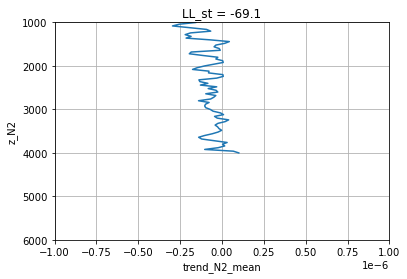

In [28]:
Data.trend_N2_mean[10,:].plot(y='z_N2')
plt.ylim([6000,1000])
plt.xlim([-1e-6,1e-6])
plt.grid(True)

In [112]:
i = 40
var = Data.trend_N2_mean[i,::-1].data[~np.isnan(Data.trend_N2_mean[i,::-1]).data]
var_ = signal.detrend(var)
var_auto_lag_, var_auto_ = autocorr(var_)
var_lag_dist = var_auto_lag_*np.diff(Data.z_N2)[0] # unit m
var_decorr_len[i]

40.0

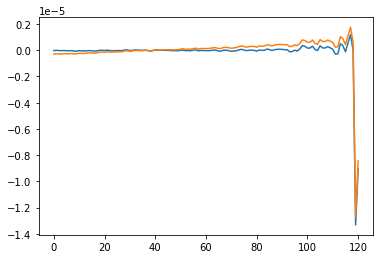

In [113]:
plt.plot(var)
plt.plot(var_)

Text(0.5, 0, 'm')

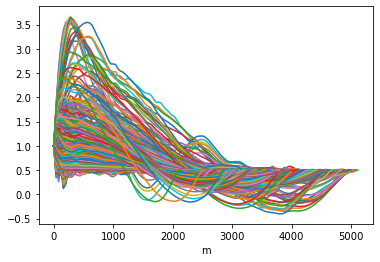

In [90]:
from scipy import signal

var_decorr_len = np.zeros(len(Data.LL_st), ) + np.nan
for i in range(len(Data.LL_st)):
    var = Data.trend_N2_mean[i,::-1].data[~np.isnan(Data.trend_N2_mean[i,::-1]).data]
    if len(var>1):
        var_ = signal.detrend(var)
        var_auto_lag_, var_auto_ = autocorr(var_)
        var_lag_dist = var_auto_lag_*np.diff(Data.z_N2)[0] # unit m
        plt.plot(var_lag_dist, np.cumsum(var_auto_))
        var_decorr_len[i] = var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]][0]
        
plt.xlabel('m')
# print(np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0], var_lag_dist[np.where(np.cumsum(var_auto_)==np.nanmax(np.cumsum(var_auto_)))[0]])


(array([   0,   40,   80,  120,  160,  200,  240,  280,  320,  360,  400,
         440,  480,  520,  560,  600,  640,  680,  720,  760,  800,  840,
         880,  920,  960, 1000, 1040, 1080, 1120, 1160, 1200, 1240, 1280,
        1320, 1360, 1400, 1440, 1480, 1520, 1560, 1600, 1640, 1680, 1720,
        1760, 1800, 1840, 1880, 1920, 1960, 2000, 2040, 2080, 2120, 2160,
        2200, 2240, 2280, 2320, 2360, 2400, 2440, 2480, 2520, 2560, 2600,
        2640, 2680, 2720, 2760, 2800, 2840, 2880, 2920, 2960, 3000, 3040,
        3080, 3120, 3160, 3200, 3240, 3280, 3320, 3360, 3400, 3440, 3480,
        3520, 3560, 3600, 3640, 3680, 3720, 3760, 3800, 3840, 3880, 3920,
        3960, 4000, 4040, 4080, 4120, 4160, 4200, 4240, 4280, 4320, 4360,
        4400, 4440, 4480, 4520, 4560, 4600, 4640, 4680, 4720, 4760, 4800]),
 array([ 1.00000000e+00,  4.60636542e-01, -5.40136789e-02, -5.95081980e-02,
        -4.89312129e-03, -1.04313403e-02, -3.46119529e-02,  2.09368209e-03,
         3.01560104e-02,  1.0967

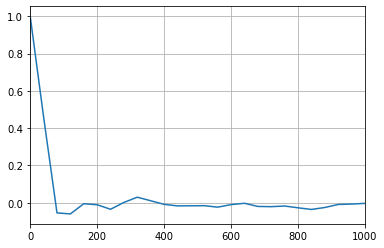

In [117]:
plt.plot(var_lag_dist, var_auto_)
plt.xlim([0,1000])
plt.grid(True)
var_lag_dist,var_auto_

In [118]:
np.cumsum(var_auto_)

array([1.        , 1.46063654, 1.40662286, 1.34711466, 1.34222154,
       1.3317902 , 1.29717825, 1.29927193, 1.32942794, 1.34039529,
       1.33219482, 1.31571069, 1.29977767, 1.28439877, 1.26111205,
       1.25146963, 1.24890843, 1.22950776, 1.2088807 , 1.19167353,
       1.16495325, 1.12941867, 1.10435667, 1.09554919, 1.08891793,
       1.08597728, 1.08706047, 1.08033423, 1.06807969, 1.0540983 ,
       1.03797355, 1.02140833, 1.00658743, 0.99525625, 0.98164225,
       0.96355458, 0.9483481 , 0.93580169, 0.92229885, 0.91242848,
       0.90191169, 0.88840736, 0.87480844, 0.86292513, 0.84930509,
       0.83080526, 0.81259579, 0.79862645, 0.78781023, 0.7792343 ,
       0.76899042, 0.75461168, 0.73857046, 0.72613956, 0.71684215,
       0.70407542, 0.68770057, 0.67283818, 0.66002314, 0.64736578,
       0.63407138, 0.62051761, 0.60829541, 0.59348028, 0.57740633,
       0.56434433, 0.55214336, 0.53985172, 0.5254619 , 0.5106084 ,
       0.49839164, 0.48707095, 0.47588752, 0.46463812, 0.45240

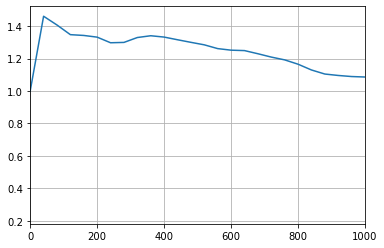

In [115]:
plt.plot(var_lag_dist, np.cumsum(var_auto_))
plt.xlim([0,1000])
plt.grid(True)

In [98]:
var_decorr_len[90]

0.0

(40.0, 93.4344528710726)

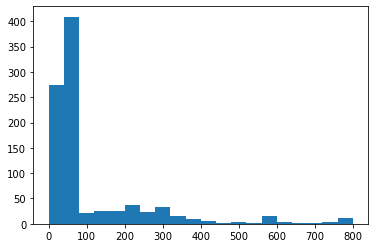

In [108]:
plt.hist(var_decorr_len, bins=20, range=(0,800))
np.nanmedian(var_decorr_len), np.nanmean(var_decorr_len)

120

In [45]:
var_auto_

array([ 1.        ,  0.06807021,  0.07965614, -0.03971651, -0.03069304,
       -0.01908664, -0.01427182, -0.01157505, -0.00801011, -0.00655876,
       -0.00589622, -0.0058802 , -0.00448   , -0.00531267, -0.00598812,
       -0.00430343, -0.00396235, -0.00394412, -0.00303421, -0.00215367,
       -0.00238753, -0.00307449, -0.00290649, -0.00263319, -0.00279212,
       -0.0033729 , -0.00359757, -0.00315267, -0.00279811, -0.00284614,
       -0.00355298, -0.00385592, -0.00374718, -0.00388986, -0.00324432,
       -0.00280296, -0.0030449 , -0.00336996, -0.00348578, -0.00351395,
       -0.00366759, -0.00460195, -0.00469883, -0.00437447, -0.00401228,
       -0.00412809, -0.00402697, -0.00414521, -0.00456013, -0.00498444,
       -0.00527606, -0.00549607, -0.00506755, -0.00512796, -0.00480012,
       -0.00494405, -0.00526771, -0.0058715 , -0.00596536, -0.00580459,
       -0.00611677, -0.00572586, -0.00604435, -0.00594224, -0.00597147,
       -0.00639371, -0.00620531, -0.00641503, -0.0066046 , -0.00